# 6. Compare the speed of the framework and the from-scratch implementation for a challenging problem. How does it change with the complexity of the network?

Comparing the speed of a deep learning framework like PyTorch with a from-scratch implementation for a challenging problem can be insightful, as it provides an understanding of the performance benefits and trade-offs of each approach. The speed comparison can be affected by various factors, including the problem complexity, network architecture, data size, and hardware resources.

Here's how the speed comparison might change with the complexity of the network:

1. **Simple Network:**
   For a relatively simple network architecture with a small number of layers and parameters, the speed difference between a framework and a from-scratch implementation might not be as significant. The overhead introduced by the framework's abstractions and optimizations could be more noticeable relative to the problem's complexity.

2. **Moderate Complexity:**
   As the network complexity increases, with more layers, units, and parameters, the deep learning framework's optimizations can become more valuable. Frameworks often leverage GPU acceleration, optimized tensor operations, and parallelism, resulting in significant speed improvements compared to a purely from-scratch implementation.

3. **Complex Network:**
   In the case of complex architectures like deep convolutional networks or large-scale recurrent networks, the gap in speed between the framework and from-scratch implementation can be substantial. The deep learning framework's low-level optimizations, automatic differentiation, and GPU acceleration can provide a significant advantage, enabling faster training and convergence.

4. **Batch Processing:**
   The deep learning framework's ability to efficiently process mini-batches of data further contributes to its speed advantage. Frameworks can take advantage of vectorized operations and parallelism to process multiple data points simultaneously, leading to faster updates of model parameters.

5. **Hardware Utilization:**
   The use of specialized hardware, such as GPUs or TPUs, can greatly accelerate training in a framework. These hardware devices are optimized for tensor operations and can significantly outperform CPUs in terms of both computation and memory bandwidth.

6. **Custom Implementation Control:**
   While a from-scratch implementation might provide more control over every aspect of the process, including initialization methods, optimization algorithms, and convergence criteria, it usually comes at the cost of development time and potentially slower execution.

In summary, deep learning frameworks like PyTorch are designed to optimize training efficiency and provide a balance between performance and flexibility. They leverage hardware acceleration, automatic differentiation, and optimizations to significantly speed up the training process, especially for complex network architectures. A from-scratch implementation, on the other hand, might offer more customization but can be significantly slower, especially for challenging problems involving complex networks.

In [ ]:
import torch.nn.init as init
import time
from tqdm import tqdm
import sys
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import warnings
import matplotlib.pyplot as plt
import cProfile
sys.path.append('/home/jovyan/work/d2l_solutions/notebooks/exercises/d2l_utils/')
import d2l
warnings.filterwarnings("ignore")


class MulMLPScratch(d2l.Classifier):
    def __init__(self, num_inputs, num_outputs, num_hiddens, lr, sigma=0.01):
        super().__init__()
        self.save_hyperparameters()
        bef = num_inputs
        self.W = []
        self.b = []
        for num_hidden in num_hiddens:
            self.W.append(nn.Parameter(torch.randn(bef, num_hidden)*sigma))
            self.b.append(nn.Parameter(torch.zeros(num_hidden)))
            bef = num_hidden
        self.W.append(nn.Parameter(torch.randn(bef, num_outputs)*sigma))
        self.b.append(nn.Parameter(torch.zeros(num_outputs)))
        
        
    def forward(self, X):
        H = X.reshape(-1, self.num_inputs)
        for i in range(len(self.W)-1):
            H = relu(torch.matmul(H, self.W[i]) + self.b[i])
        return torch.matmul(H, self.W[-1]) + self.b[-1]
    
    def configure_optimizers(self):
        return d2l.SGD([*self.W, *self.b], self.lr)

def stat_time(model, data):
    t0 = time.time()
    trainer = d2l.Trainer(max_epochs=10, plot_flag=False)
    trainer.fit(model, data)
    return time.time() - t0


In [ ]:
num_hiddens=[256,128,64,32,16]
ts = []
ts_strach = []
for i in tqdm(range(1,len(num_hiddens)+1)):
    model = MulMLP(num_outputs=10, num_hiddens=num_hiddens[:i], lr=0.1)
    model_scratch = MulMLPScratch(num_inputs=784, num_outputs=10, num_hiddens=num_hiddens[:i], lr=0.1)
    ts_strach.append(stat_time(model_scratch, data))
    ts.append(stat_time(model, data))

In [ ]:
d2l.plot(list(range(1,len(num_hiddens)+1)),[ts,ts_strach],legend=['framework','scratch'])

# 7. Measure the speed of tensor–matrix multiplications for well-aligned and misaligned matrices. For instance, test for matrices with dimension 1024, 1025, 1026, 1028, and 1032.
- How does this change between GPUs and CPUs?
- Determine the memory bus width of your CPU and GPU.

To measure the speed of tensor-matrix multiplications for well-aligned and misaligned matrices, and to analyze the differences between GPUs and CPUs, you can use PyTorch and the `torch` library. Additionally, determining the memory bus width requires information about the specific GPU and CPU models you're using.

Here's how you can perform the measurements and gather memory bus width information:

In [20]:
import torch
import time

# List of matrix dimensions to test
matrix_dimensions = [1024, 1025, 1026, 1028, 1032]

# Perform tensor-matrix multiplication and measure execution time
def measure_multiplication_speed(matrix_dim, device):
    torch.manual_seed(42)  # Set seed for reproducibility
    matrix = torch.randn(matrix_dim, matrix_dim).to(device)
    vector = torch.randn(matrix_dim, 1).to(device)
    
    start_time = time.time()
    result = torch.matmul(matrix, vector)
    end_time = time.time()
    
    execution_time = end_time - start_time
    return execution_time

# Test on CPU
print("CPU:")
for dim in matrix_dimensions:
    cpu_time = measure_multiplication_speed(dim, 'cpu')
    print(f"Matrix Dimension: {dim}, CPU Execution Time: {cpu_time:.6f} seconds")

# Test on GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("\nGPU:")
    for dim in matrix_dimensions:
        gpu_time = measure_multiplication_speed(dim, device)
        print(f"Matrix Dimension: {dim}, GPU Execution Time: {gpu_time:.6f} seconds")
else:
    print("\nGPU not available.")

# Determine memory bus width (for example, on NVIDIA GPUs)
if torch.cuda.is_available():
    gpu = torch.device("cuda")
    print("\nGPU Memory Bus Width:")
    print(torch.cuda.get_device_properties(gpu).pci_bus_id)
else:
    print("\nGPU not available.")

# Determine memory bus width of CPU (requires additional system information)
# Note: This step may involve querying the system specifications, motherboard manual, or manufacturer's documentation.
# You may use tools like `lshw`, `lscpu`, or CPU-Z to gather information.

CPU:
Matrix Dimension: 1024, CPU Execution Time: 0.004765 seconds
Matrix Dimension: 1025, CPU Execution Time: 0.000237 seconds
Matrix Dimension: 1026, CPU Execution Time: 0.000252 seconds
Matrix Dimension: 1028, CPU Execution Time: 0.000214 seconds
Matrix Dimension: 1032, CPU Execution Time: 0.000244 seconds

GPU not available.

GPU not available.


In this example, the `measure_multiplication_speed` function is used to measure the execution time of tensor-matrix multiplications on both CPU and GPU devices. The script first tests the matrix-multiplication performance on the CPU and, if a GPU is available, tests it on the GPU as well.

Regarding determining the memory bus width of your CPU and GPU, this information usually requires detailed specifications about your hardware. The example code demonstrates how to gather the GPU's PCI bus ID, which provides some hardware-related information. However, determining the memory bus width of a CPU might involve additional steps, such as referring to your system specifications or using specialized hardware analysis tools.

Keep in mind that memory bus width can significantly affect memory bandwidth, which in turn can impact data transfer speed between memory and processing units.

# 8. Try out different activation functions. Which one works best?

In [ ]:
class ActMLP(d2l.Classifier):
    def __init__(self, num_outputs, num_hiddens, lr, act=act):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.LazyLinear(num_hiddens),
                                 nn.ReLU(), nn.LazyLinear(num_outputs))
        
def stat_act(act, data):
    model = ActMLP(num_outputs=10, num_hiddens=256, lr=0.1, act=act)
    trainer = d2l.Trainer(max_epochs=10, plot_flag=False)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32))
    return model.accuracy(y_hat,data.val.targets).item()

In [ ]:
acts = [nn.ReLU(),nn.Sigmoid(), nn.Tanh(),nn.LeakyReLU(negative_slope=0.01),nn.PReLU(num_parameters=1)]
accs = []
for act in tqdm(acts):
    accs.append(stat_act(act, data))

In [ ]:
d2l.plot(list(range(len(acts))),accs[-len(lrs):],'activation','acc')

# 9. Is there a difference between weight initializations of the network? Does it matter?

Yes, there is a significant difference between weight initializations in a neural network, and it does matter. Weight initialization plays a crucial role in the convergence speed and stability of training, as well as the overall performance of a neural network.

Different weight initializations can lead to different learning dynamics during training, affect the optimization process, and impact the network's ability to generalize to new data. Here are a few key points to consider:

1. **Vanishing and Exploding Gradients:**
   Poor weight initialization can lead to vanishing or exploding gradients, where the gradients become very small or very large as they are backpropagated through the network during training. This can slow down or hinder the convergence of the optimization process.

2. **Convergence Speed:**
   Proper weight initialization can help the network converge to a solution faster. Well-initialized networks tend to start with a better "starting point" in the optimization landscape, allowing the network to find a good solution more quickly.

3. **Stability and Regularization:**
   Certain weight initializations can act as implicit forms of regularization. For example, using a proper initialization can help prevent the network from immediately fitting noise in the training data.

4. **Activation Functions:**
   Different activation functions may require different weight initialization methods to ensure their effective usage. For example, the choice of initialization for a ReLU-based network might differ from that of a network using sigmoid activations.

5. **Network Capacity and Depth:**
   The choice of weight initialization may vary with the complexity of the network architecture. Deep networks might require more careful initialization due to the vanishing/exploding gradient problem.

6. **Transfer Learning:**
   Pre-trained models often come with their own weight initializations. Using these pre-trained weights can help in transfer learning tasks, as the network starts with features that are already useful for a related task.

Common weight initialization methods include Xavier/Glorot initialization, He initialization, uniform initialization, and normal initialization. The specific choice of initialization method depends on the network architecture, the activation functions used, and the problem domain.

In summary, weight initialization is not a trivial step in neural network training. Careful consideration and experimentation with different initialization methods can greatly impact the model's convergence, training stability, and final performance.

In [17]:
class MLP(d2l.Classifier):
    def __init__(self, num_inputs,num_outputs, num_hiddens, lr):
        super().__init__()
        self.save_hyperparameters()
        self.net = nn.Sequential(nn.Flatten(), nn.Linear(num_inputs,num_hiddens),
                                 nn.ReLU(), nn.Linear(num_hiddens,num_outputs))
        

def init_xavier(module):
    if isinstance(module, nn.Linear):
        init.xavier_uniform(module.weight)
        if module.bias is not None:
            init.constant_(module.bias, 0)
            
def init_uniform(module):
    if isinstance(module, nn.LazyLinear):
        init.uniform_(module.weight)
        if module.bias is not None:
            init.constant_(module.bias, 0)
            
def init_normal(module):
    if isinstance(module, nn.LazyLinear):
        init.normal_(module.weight)
        if module.bias is not None:
            init.constant_(module.bias, 0)
            
        
def stat_init(init_f, data):
    model = MLP(num_inputs=784,num_outputs=10, num_hiddens=256, lr=0.1)
    model.apply(init_f)
    trainer = d2l.Trainer(max_epochs=10, plot_flag=True)
    trainer.fit(model, data)
    y_hat = model(data.val.data.type(torch.float32))
    return model.accuracy(y_hat,data.val.targets).item()

100%|██████████| 3/3 [08:23<00:00, 167.90s/it]


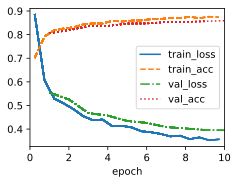

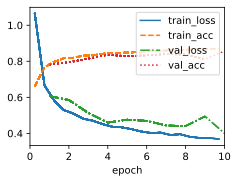

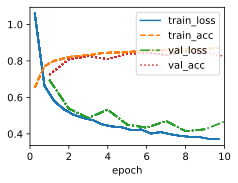

In [18]:
data = d2l.FashionMNIST(batch_size=256)
inits = [init_xavier,init_uniform,init_normal]
accs = []
for i in tqdm(inits):
    accs.append(stat_init(i, data))

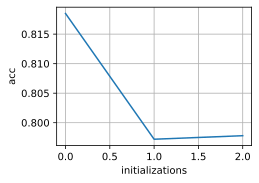

In [19]:
d2l.plot(list(range(len(inits))),accs[-len(inits):],'initializations','acc')